In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
from scipy import stats
import hvplot.pandas

import requests
import json

# Import the API key
from config import geoapify_key


In [2]:
# Read saved data
Skills_List_db = pd.read_csv("Resources/Skills_Priority_List_2022.csv")

# Display sample data
Skills_List_db.head()

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
0,111111,Chief Executive or Managing Director,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
1,111211,Corporate General Manager,NS,Moderate,NS,NS,NS,NS,NS,NS,NS,NS
2,121111,Aquaculture Farmer,NS,Moderate,NS,NS,S,NS,NS,NS,S,NS
3,121311,Apiarist,S,Moderate,S,S,S,S,NS,S,S,S
4,121312,Beef Cattle Farmer,NS,Soft,R,NS,S,NS,NS,NS,S,NS


In [3]:
Shortage = Skills_List_db["Current National Labour Market Rating"].value_counts()

NS    628
S     278
R       8
Name: Current National Labour Market Rating, dtype: int64

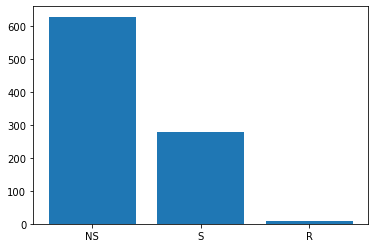

In [4]:
x_axis= Shortage.index

y_axis = Shortage.values

plt.bar(x_axis, y_axis, align="center")

Shortage

In [5]:
Future_Demand = Skills_List_db["National Future Demand Rating"].value_counts()

Moderate    572
Strong      234
Soft        108
Name: National Future Demand Rating, dtype: int64

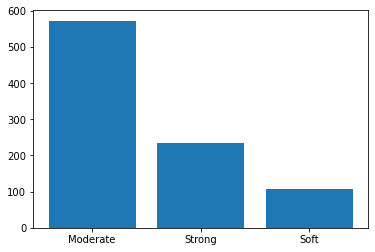

In [6]:
x_axis= Future_Demand.index

y_axis = Future_Demand.values

plt.bar(x_axis, y_axis, align="center")

Future_Demand

In [7]:
NSW_data = Skills_List_db.loc[(Skills_List_db["Current National Labour Market Rating"]=="S") & (Skills_List_db["National Future Demand Rating"]=="Strong")& (Skills_List_db["NSW"]=="S"),:]

In [8]:
NSW_data

,ANZSCO Code,Occupation title,Current National Labour Market Rating,National Future Demand Rating,NSW,VIC,QLD,SA,WA,TAS,NT,ACT
35,132511,Research and Development Manager,S,Strong,S,S,S,S,S,S,S,S
63,139914,Quality Assurance Manager,S,Strong,S,S,S,S,S,S,S,S
211,233212,Geotechnical Engineer,S,Strong,S,S,S,S,S,S,S,S
220,233611,Mining Engineer (excluding Petroleum),S,Strong,S,S,S,S,S,S,S,S
221,233612,Petroleum Engineer,S,Strong,S,S,S,S,S,S,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
829,712211,Driller,S,Strong,S,S,S,S,S,S,S,S
830,712212,Miner,S,Strong,S,S,S,S,S,S,S,S
878,821412,Home Improvement Installer,S,Strong,S,S,S,S,NS,S,S,S
885,831211,Meat Boner and Slicer,S,Strong,S,S,S,S,NS,S,S,S


In [9]:
# Read saved data
Glassdoor_db = pd.read_csv("Resources/glassdoor_reviews.csv")

# Display sample data
Glassdoor_db.head()



,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [10]:
# Display sample data
Glassdoor_db.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


In [11]:
Locs = Glassdoor_db.location.value_counts()

In [12]:
Locs.to_csv("Output_data/Locations.csv")

In [ ]:
# Glassdoor_db_Aus = Glassdoor_db.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)

In [ ]:
# Glassdoor_db_Aus = Glassdoor_db.location.str.contains(r"australia|tasmania|victoria|new south wales|northern territory", case=False)


In [ ]:
# Glassdoor_db_Aus.value_counts()

In [14]:
Glassdoor_db.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [104]:
Data= Glassdoor_db.loc[Glassdoor_db.location.str.contains(r"australia|victoria|tasmania|new south wales|northern territory|queensland|act|capital territory|nsw|vic|qld|sa|wa|tas|nt", case=False) == True,:]

In [105]:
Data.head()


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
7,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,NaN,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
9,AFH-Wealth-Management,2017-02-21,Technician,"Former Employee, more than 3 years","Santa Ana, CA",1,1.0,1.0,NaN,1.0,3.0,1.0,x,x,x,Honest Review,Made some life time friends.,Was let go from the company just before Christ...
10,AFH-Wealth-Management,2017-03-06,Administrative Support,"Current Employee, less than 1 year","San Juan Capistrano, CA",1,3.0,1.0,NaN,2.0,1.0,1.0,x,x,x,Avoid at all cost,"I can't think of any obvious ones, although I'...",Disgustingly low wages. Staff are not valued. ...
62,AFH-Wealth-Management,2021-05-13,Mortgage and Protection Advisor,"Former Employee, more than 1 year","Taunton, England, England",5,5.0,5.0,5.0,5.0,4.0,5.0,o,o,o,Mortgage Advisor,Good company to work for,Communication between departments is lacking
99,AJ-Bell,2019-05-09,Customer Service Administrator,"Former Employee, more than 1 year","Salford, North West England, England, England",4,5.0,5.0,NaN,4.0,3.0,1.0,x,v,r,Great Stepping Stone,Great Company\r\nGreat colleagues to work with...,Terrible upper management who dump things on y...


In [106]:
Data.to_csv("Output_data/Glassdoor_Aus_Data.csv")

In [107]:
Locs_filtered = Data.location.value_counts()

Locs_filtered.to_csv("Output_data/Locations_Filtered.csv")

In [108]:
Locs_filtered

San Francisco, CA                           7371
Redmond, WA                                 6812
Toronto, ON                                 6752
Atlanta, GA                                 4200
Washington, DC                              3480
                                            ... 
Freeland, WA                                   1
Rancho Santa Fe, CA                            1
Centralia, MO                                  1
Gordon, South Australia, South Australia       1
Centre, AL                                     1
Name: location, Length: 2378, dtype: int64

In [109]:
# Set the search parameters
target_city = "Perth, Western Australia, Western Australia"

params = {
    "text": target_city,
    "apiKey": geoapify_key
}

# Build URL using the geocode endpoint
base_url = "https://api.geoapify.com/v1/geocode/search"

In [110]:
# Run request
response = requests.get(base_url, params=params).json()

# Print the json (pretty printed)
print(json.dumps(response, indent=4, sort_keys=True))

{
    "features": [
        {
            "bbox": [
                115.7005801,
                -32.1158964,
                116.0205801,
                -31.7958964
            ],
            "geometry": {
                "coordinates": [
                    115.8605801,
                    -31.9558964
                ],
                "type": "Point"
            },
            "properties": {
                "address_line1": "Perth",
                "address_line2": "Perth WA 6000, Australia",
                "category": "populated_place",
                "city": "Perth",
                "country": "Australia",
                "country_code": "au",
                "county": "City of Perth",
                "datasource": {
                    "attribution": "\u00a9 OpenStreetMap contributors",
                    "license": "Open Database License",
                    "sourcename": "openstreetmap",
                    "url": "https://www.openstreetmap.org/copyright"
                

In [111]:
# Extract lat/lon
lat = response["features"][0]["properties"]["lat"]
lon = response["features"][0]["properties"]["lon"]
country = response["features"][0]["properties"]["country"]
city = response["features"][0]["properties"]["city"]
state = response["features"][0]["properties"]["state"]
state_code = response["features"][0]["properties"]["state_code"]

# Print results
print(f"{city}, {state}, {state_code}, {country}: {lat}, {lon}")

Perth, Western Australia, WA, Australia: -31.9558964, 115.8605801


In [112]:
cities = Locs_filtered.index

In [113]:

# Define an empty list to fetch data for each city
city_data = []

for city in cities:
    target_city = city
    params = {
    "text": target_city,
    "apiKey": geoapify_key}
    # Build URL using the geocode endpoint
    base_url = "https://api.geoapify.com/v1/geocode/search"
    
    try: 
        # Run request
        response = requests.get(base_url, params=params).json()
        # Extract lat/lon
        lat = response["features"][0]["properties"]["lat"]
        lon = response["features"][0]["properties"]["lon"]
        country = response["features"][0]["properties"]["country"]
        city_r = response["features"][0]["properties"]["city"]
        state = response["features"][0]["properties"]["state"]
        state_code = response["features"][0]["properties"]["state_code"]
        # Print results
        print(f"{city_r}, {state}, {state_code},{country}: {lat}, {lon}")

        city_data.append({"City": city_r,
                          "country": country,
                          "Latitude": lat,
                          "Longitude": lon,
                          "Location":  city,
                          "State": state,
                          "State Code": state_code
        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

San Francisco, California, CA,United States: 37.7790262, -122.419906
Redmond, Western Australia, WA,Australia: -34.8888587, 117.6920291
Toronto, Ontario, ON,Canada: 43.6534817, -79.3839347
Atlanta, Georgia, GA,United States: 33.7489924, -84.3902644
Washington, District of Columbia, DC,United States: 38.8983696, -77.0058628
Seattle, Washington, WA,United States: 47.6038321, -122.330062
Mountain View, California, CA,United States: 37.3893889, -122.0832101
San Jose, California, CA,United States: 37.3361663, -121.890591
Salt Lake City, Utah, UT,United States: 40.7596198, -111.8867975
Montreal, Quebec, QC,Canada: 45.5031824, -73.5698065
Newcastle-Maitland, New South Wales, NSW,Australia: -32.9416524, 151.6628275
Coventry, England, ENG,United Kingdom: 52.4081812, -1.510477
San Antonio, Texas, TX,United States: 29.4246002, -98.4951405
San Diego, California, CA,United States: 32.7174202, -117.1627728
City not found. Skipping...
Saint Louis, Missouri, MO,United States: 38.6319657, -90.2428756
B

In [114]:
city_data

[{'City': 'San Francisco',
  'country': 'United States',
  'Latitude': 37.7790262,
  'Longitude': -122.419906,
  'Location': 'San Francisco, CA',
  'State': 'California',
  'State Code': 'CA'},
 {'City': 'Redmond',
  'country': 'Australia',
  'Latitude': -34.8888587,
  'Longitude': 117.6920291,
  'Location': 'Redmond, WA',
  'State': 'Western Australia',
  'State Code': 'WA'},
 {'City': 'Toronto',
  'country': 'Canada',
  'Latitude': 43.6534817,
  'Longitude': -79.3839347,
  'Location': 'Toronto, ON',
  'State': 'Ontario',
  'State Code': 'ON'},
 {'City': 'Atlanta',
  'country': 'United States',
  'Latitude': 33.7489924,
  'Longitude': -84.3902644,
  'Location': 'Atlanta, GA',
  'State': 'Georgia',
  'State Code': 'GA'},
 {'City': 'Washington',
  'country': 'United States',
  'Latitude': 38.8983696,
  'Longitude': -77.0058628,
  'Location': 'Washington, DC',
  'State': 'District of Columbia',
  'State Code': 'DC'},
 {'City': 'Seattle',
  'country': 'United States',
  'Latitude': 47.603

In [115]:
Data.head(20)

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
7,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,NaN,5.0,4.0,5.0,v,o,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...
9,AFH-Wealth-Management,2017-02-21,Technician,"Former Employee, more than 3 years","Santa Ana, CA",1,1.0,1.0,NaN,1.0,3.0,1.0,x,x,x,Honest Review,Made some life time friends.,Was let go from the company just before Christ...
10,AFH-Wealth-Management,2017-03-06,Administrative Support,"Current Employee, less than 1 year","San Juan Capistrano, CA",1,3.0,1.0,NaN,2.0,1.0,1.0,x,x,x,Avoid at all cost,"I can't think of any obvious ones, although I'...",Disgustingly low wages. Staff are not valued. ...
62,AFH-Wealth-Management,2021-05-13,Mortgage and Protection Advisor,"Former Employee, more than 1 year","Taunton, England, England",5,5.0,5.0,5.0,5.0,4.0,5.0,o,o,o,Mortgage Advisor,Good company to work for,Communication between departments is lacking
99,AJ-Bell,2019-05-09,Customer Service Administrator,"Former Employee, more than 1 year","Salford, North West England, England, England",4,5.0,5.0,NaN,4.0,3.0,1.0,x,v,r,Great Stepping Stone,Great Company\r\nGreat colleagues to work with...,Terrible upper management who dump things on y...
106,AJ-Bell,2019-12-21,Administrative,"Current Employee, more than 8 years","Salford, North West England, England, England",4,3.0,4.0,NaN,4.0,3.0,4.0,v,v,v,Good employer,Growing firm with a good reputation,Large turnover of staff lower paid roles
109,AJ-Bell,2020-02-06,Customer Service Administrator,"Former Employee, more than 1 year","Salford, North West England, England, England",3,4.0,4.0,NaN,3.0,2.0,3.0,v,r,v,Good place to start but limited career prospec...,Good working environment\nMostly friendly staf...,Low pay & small bonuses\nRepetitive work\nEver...
128,AJ-Bell,2020-06-11,Team Leader,"Current Employee, more than 1 year","Salford, North West England, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,x,x,"A culture of cover ups, sexism, bullying and s...",If you like working for a company that is sexi...,Low pay\r\nLow pension contributions.\r\nCar p...
138,AJ-Bell,2020-10-02,Benefits Administrator,Current Employee,"Manchester City Centre, England, England",3,NaN,NaN,NaN,NaN,NaN,NaN,o,o,o,Okay,There is opportunity to progress,The training isn’t always provided
140,AJ-Bell,2020-11-25,YouInvest Advisor,"Former Employee, more than 1 year","Salford, North West England, England, England",3,4.0,1.0,1.0,1.0,5.0,3.0,x,v,v,"Good job, awful people",AJ Bell is an excellent company with a good pa...,"It’s like a school playground. Very cliquey, u..."


In [116]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          1959
country       1959
Latitude      1959
Longitude     1959
Location      1959
State         1959
State Code    1959
dtype: int64

In [117]:
city_data_df

,City,country,Latitude,Longitude,Location,State,State Code
0,San Francisco,United States,37.779026,-122.419906,"San Francisco, CA",California,CA
1,Redmond,Australia,-34.888859,117.692029,"Redmond, WA",Western Australia,WA
2,Toronto,Canada,43.653482,-79.383935,"Toronto, ON",Ontario,ON
3,Atlanta,United States,33.748992,-84.390264,"Atlanta, GA",Georgia,GA
4,Washington,United States,38.898370,-77.005863,"Washington, DC",District of Columbia,DC
...,...,...,...,...,...,...,...
1954,Vermontville,United States,42.628925,-85.024162,"Vermontville, MI",Michigan,MI
1955,Freeland,United States,48.027828,-122.547194,"Freeland, WA",Washington,WA
1956,Rancho Santa Fe,United States,33.020321,-117.202813,"Rancho Santa Fe, CA",California,CA
1957,Centralia,United States,39.210319,-92.137954,"Centralia, MO",Missouri,MO


In [118]:
# Configure the map plot
map_plot_1 = city_data_df.hvplot.points(
    "Longitude",
    "Latitude",
    frame_width = 700,
    frame_height = 500,
    geo = True,
    tiles = "OSM",
    #size = "Location",
    color = "City"
)

# Display the map
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (City)

In [119]:
Data.columns

Data = Data.rename (columns={"location":"Location"})

In [120]:
city_data_df.columns

Index(['City', 'country', 'Latitude', 'Longitude', 'Location', 'State',
       'State Code'],
      dtype='object')

In [121]:
Data.columns

Index(['firm', 'date_review', 'job_title', 'current', 'Location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [122]:
# Merge two dataframes using an inner join
merge_df = pd.merge(Data, city_data_df, on="Location")
merge_df

,firm,date_review,job_title,current,Location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,...,outlook,headline,pros,cons,City,country,Latitude,Longitude,State,State Code
0,AFH-Wealth-Management,2016-09-25,Anonymous Employee,"Current Employee, more than 5 years","Century City, CA",5,5.0,5.0,NaN,5.0,...,v,Good place to work,The people are great and the culture is very f...,Wouldn't necessarily say there are any cons to...,Los Angeles,United States,34.057359,-118.414608,California,CA
1,Apple,2013-05-17,Specialist,"Former Employee, more than 1 year","Century City, CA",5,5.0,5.0,NaN,5.0,...,v,You get what you put in,Amazing place to work for obvious reasons. Yo...,I worked at an Apple store in a huge city so I...,Los Angeles,United States,34.057359,-118.414608,California,CA
2,Apple,2016-02-02,Family Room Specialist,"Current Employee, more than 1 year","Century City, CA",1,1.0,4.0,NaN,1.0,...,r,"Great company, coworkers, but horrible management",Great coworkers that in some ways can become y...,Extremely inconvenient and unpredictable hours...,Los Angeles,United States,34.057359,-118.414608,California,CA
3,Apple,2016-05-22,Specialist,"Former Employee, less than 1 year","Century City, CA",4,5.0,5.0,NaN,3.0,...,o,Good People,Coworkers - the type of people who work at App...,Some of the most insane retail experiences I'v...,Los Angeles,United States,34.057359,-118.414608,California,CA
4,Apple,2017-04-25,Inventory Specialist,"Former Employee, more than 5 years","Century City, CA",3,3.0,5.0,NaN,2.0,...,v,"Good People, Bad Management",Great benefits and mostly good people.,"""Company that cares"" but they never let you fo...",Los Angeles,United States,34.057359,-118.414608,California,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71398,YOOX-NET-A-PORTER-GROUP,2021-03-23,Associate Developer,"Current Employee, more than 3 years",Zola Predosa,1,5.0,1.0,NaN,1.0,...,x,Worst career choice,- Nice colleagues (as long as they still were ...,- Lack of transparency from top management\n- ...,Zola Predosa,Italy,44.489665,11.218309,Emilia-Romagna,EMI
71399,YOOX-NET-A-PORTER-GROUP,2018-01-13,Software Developer,"Current Employee, more than 1 year",Casalecchio di Reno,3,3.0,3.0,NaN,3.0,...,r,Software Developer,"Great work place, a lot teams and nice interac...",little communication between various sectors,Casalecchio di Reno,Italy,44.476018,11.275686,Emilia-Romagna,EMI
71400,ibis,2019-11-08,IT Manager,"Current Employee, more than 3 years","Itajaí, Santa Catarina, Santa Catarina",3,3.0,3.0,NaN,3.0,...,v,Employment,Very well structured organization.,Less staffing and more work load,Itajaí,Brazil,-26.904679,-48.655298,Santa Catarina,SC
71401,mydentist-UK,2021-04-19,Dental Nurse,"Current Employee, more than 1 year","Crickhowell, Wales, Wales",4,4.0,3.0,4.0,4.0,...,o,Brilliant place to start your career,"Free training, Free CPD, Free uniform","Pay isn’t the best, head office always wants m...",Wales,United States,48.895238,-98.600806,North Dakota,ND


In [123]:
Australia_Data = merge_df.loc[(merge_df.country == "Australia"),:]

In [124]:
Australia_Data.reset_index()

,index,firm,date_review,job_title,current,Location,overall_rating,work_life_balance,culture_values,diversity_inclusion,...,outlook,headline,pros,cons,City,country,Latitude,Longitude,State,State Code
0,2090,ALDI,2016-10-29,Warehouse Selector,"Current Employee, less than 1 year","Cardiff, Wales, Wales",4,3.0,4.0,NaN,...,v,Warehouse selector,"Very good salary, with exciting benefits and h...",If you are looking to go to work and do basica...,Newcastle-Maitland,Australia,-32.941652,151.662827,New South Wales,NSW
1,2091,ALDI,2016-11-28,Hgv Driver,"Former Employee, more than 1 year","Cardiff, Wales, Wales",3,3.0,2.0,NaN,...,x,"Hgv,1 driver",Good fleet and friendly management. Decent wor...,Wages wasn't what I was promised in interview....,Newcastle-Maitland,Australia,-32.941652,151.662827,New South Wales,NSW
2,2092,ALDI,2017-11-16,Warehouse Selector,"Current Employee, less than 1 year","Cardiff, Wales, Wales",5,5.0,5.0,NaN,...,v,Amazing company,Great wage. Great hours. Great staff.,No cons from what ive seen,Newcastle-Maitland,Australia,-32.941652,151.662827,New South Wales,NSW
3,2093,ALDI,2018-07-13,Selecror,"Current Employee, more than 1 year","Cardiff, Wales, Wales",5,5.0,5.0,NaN,...,v,Brilliant place to.work,Great team great pay very flexible,Every things going well so far,Newcastle-Maitland,Australia,-32.941652,151.662827,New South Wales,NSW
4,2094,ALDI,2019-05-19,ASM,"Current Employee, more than 8 years","Cardiff, Wales, Wales",4,2.0,5.0,NaN,...,v,Well paid,Money shifts can match home life,Lates that's it really to be honest,Newcastle-Maitland,Australia,-32.941652,151.662827,New South Wales,NSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,71257,Serco-Group,2019-10-30,Senior Facilities Manager,"Former Employee, more than 1 year","Derby, Western Australia, Western Australia",3,NaN,NaN,NaN,...,o,Interesting culture,"Good people, autonomy, travel and pays reasona...","Too much travel, lack of clarity on roles & ac...",Derby,Australia,-17.303191,123.628723,Western Australia,WA
9215,71261,Sodexo,2017-07-21,Anonymous Employee,Former Employee,"Balcatta, Western Australia",3,1.0,3.0,NaN,...,r,Not as it seems in Remote Sites,Opportunities to progress within company or tr...,No work life balance\r\nThe culture - everyone...,City Of Stirling,Australia,-31.870906,115.819802,Western Australia,WA
9216,71334,The-Salvation-Army,2021-05-27,Anonymous Employee,Former Employee,Sandringham,4,4.0,5.0,4.0,...,v,Very Conservative,The work makes you feel good,The Salvation Army can be very nepotistic,Melbourne,Australia,-37.950259,145.004387,Victoria,VIC
9217,71355,Unilever,2015-01-28,Manager,"Former Employee, more than 1 year","Rosebery, New South Wales, New South Wales",1,1.0,1.0,NaN,...,x,don't go to this company,"Bad compnay, bad company, bad company","Bad company, hypocrite people, liar senior man...",Sydney,Australia,-33.918586,151.204692,New South Wales,NSW


In [125]:
# Configure the map plot
map_plot_2 = Australia_Data.hvplot.points(
    "Longitude",
    "Latitude",
    frame_width = 700,
    frame_height = 500,
    geo = True,
    tiles = "OSM",
    #size = "Location",
    color = "Location"
)

# Display the map
map_plot_2

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Location)

In [126]:
Australia_Data["State Code"].value_counts()

WA     7284
NSW    1816
VIC      72
QLD      34
TAS       7
SA        6
Name: State Code, dtype: int64

In [127]:
merge_df.to_csv("Output_data/First_Filter_Locations.csv")

Australia_Data.to_csv("Output_data/Australia_Data_GD_Data.csv")

In [130]:
# Read saved data
Company_Reviews_db = pd.read_csv("Resources/individual_company_reviews.csv")

# Display sample data
Company_Reviews_db.columns

Index(['reviewer_overall_rating', 'reviewer_benefits_perks',
       'reviewer_career_development', 'reviewer_workLife_balance',
       'reviewer_working_environment', 'reviewer_management',
       'reviewer_diversity_eq_opportunity', 'reviewer_review_title',
       'reviewer_salary_rating', 'reviewer_company_recommendation',
       'review_positive_feedback', 'review_negative_feedback', 'reviewer_role',
       'review_date', 'reviewer_location', 'reviewer_years_worked',
       'review_url', 'company_url', 'company_name', 'company_overall_rating',
       'company_count_of_reviewers', 'company_5_star_count',
       'company_4_star_count', 'company_3_star_count', 'company_2_star_count',
       'company_1_star_count', 'company_av_or_high_salary_percent',
       'company_percent_recommended', 'company_description',
       'company_headquarters', 'company_size', 'company_count_of_reviewers.1'],
      dtype='object')

In [132]:
Company_Reviews_db["company_name"].value_counts()

Telstra                           1480
Commonwealth Bank of Australia    1021
NAB                                923
Downer                             907
Kmart                              860
                                  ... 
Quay Consulting                      1
Felton Grimwade & Bosisto's          1
Noggin                               1
Meridian One                         1
Bundoora Secondary College           1
Name: company_name, Length: 701, dtype: int64

In [133]:
# Read saved data
Seek_Data_01_db = pd.read_csv("Resources/seek_australia.csv")

# Display sample data
Seek_Data_01_db.columns

Index(['index', 'category', 'city', 'company_name', 'geo', 'job_board',
       'job_description', 'job_title', 'job_type', 'post_date',
       'salary_offered', 'state', 'url'],
      dtype='object')

In [137]:
Seek_Data_01_db.salary_offered.describe

<bound method NDFrame.describe of 0             $100k Base + Super + Benefits
1           Excellent remuneration packages
2                                       NaN
3                                       NaN
4                                       NaN
                        ...                
29995    Annualised salary, uniform + Super
29996       Salary package to be negotiated
29997               $110k Package On Offer!
29998                                   NaN
29999                                   NaN
Name: salary_offered, Length: 30000, dtype: object>

In [138]:
# Read saved data
Seek_Data_02_db = pd.read_csv("Resources/seek_job_detail_scraped.csv")

# Display sample data
Seek_Data_02_db.columns

Index(['job_title', 'job_advertiser', 'job_advertiser_url',
       'job_advertiser_rating_out_of_5', 'days_since_job_post', 'when_scraped',
       'job_details', 'job_url', 'job_city', 'job_suburb', 'job_category_a',
       'job_category_b', 'job_salary_desc', 'job_type'],
      dtype='object')

In [139]:
Seek_Data_01_db

,index,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,Hospitality & Tourism,Sydney,Radisson Blu Plaza Hotel Sydney,AU,seek,Hotel snapshot The Radisson Blu Plaza Sydney ...,Bar Supervisor,Full Time,2018-04-11T04:20:40Z,"Annualised salary, uniform + Super","CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35958503
29996,29996,CEO & General Management,ACT,Airservices Australia,AU,seek,The Organisation Airservices is a government ...,Deputy Board Secretary,Full Time,2018-04-11T04:00:49Z,Salary package to be negotiated,NaN,https://www.seek.com.au/job/35958100
29997,29997,Accounting,Melbourne,The Hassett Group,AU,seek,ABOUT THE COMPANY AND ROLE Our client is one o...,Corporate Accountant,Full Time,2018-04-11T02:45:37Z,$110k Package On Offer!,CBD & Inner Suburbs,https://www.seek.com.au/job/35956991
29998,29998,Government & Defence,ACT,SOS Recruitment,AU,seek,Long term contract for 12 months with possibl...,APS 6 & EL1 Account Managers,Contract/Temp,2018-04-11T04:55:16Z,NaN,NaN,https://www.seek.com.au/job/35959184


In [140]:
Seek_Data_02_db

,job_title,job_advertiser,job_advertiser_url,job_advertiser_rating_out_of_5,days_since_job_post,when_scraped,job_details,job_url,job_city,job_suburb,job_category_a,job_category_b,job_salary_desc,job_type
0,Solution Architect,DWS Limited,https://seek.com.au/companies/dws-433963,2.8,Posted 25d ago,5/18/2021,"About Us:\n Established in 1991, DWS is a prof...",https://www.seek.com.au//job/52099464,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,up to $170k package (inc. super) + great benefits,Full Time
1,Data Engineer,Shoolin Consultancy,NaN,NaN,Posted 18d ago,5/18/2021,We are looking for \nData Enginee\nr for an in...,https://www.seek.com.au//job/52154042,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Engineering - Software,"$120,000 - $159,999",Full Time
2,Data Architect,ASIC,https://seek.com.au/companies/asic-795441,3.5,Posted 1d ago,5/18/2021,ASIC is seeking an experience Solution & Data ...,https://www.seek.com.au//job/52298066,Melbourne,CBD & Inner Suburbs,Government & Defence,Government - Federal,NaN,Full Time
3,Data Architect,ASIC,https://seek.com.au/companies/asic-795441,3.5,Posted 1d ago,5/18/2021,ASIC is seeking an experience Solution & Data ...,https://www.seek.com.au//job/52298065,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,NaN,Full Time
4,Data Architect,InfoCentric Pty Ltd,NaN,NaN,Posted 7d ago,5/18/2021,"As the Data Architect, you will assist in a la...",https://www.seek.com.au//job/52246856,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Other,NaN,Full Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,Cloud Systems Engineer - Azure,ecareer employment services,NaN,NaN,Posted 14d ago,2021-05-24,"Cloud Server Engineer - Azure, Sydney or Melbo...",https://www.seek.com.au//job/52225417,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,NaN,Full Time
6096,Principal Consultant - Research and Evaluation,Synergistiq Pty Ltd,NaN,NaN,Posted 5d ago,2021-05-24,Research and Evaluation Principal Consultant L...,https://www.seek.com.au//job/52318592,Melbourne,CBD & Inner Suburbs,Consulting & Strategy,Other,NaN,Full Time
6097,.Net Developer,rhipe,NaN,NaN,Posted 16d ago,2021-05-24,We are seeking for an experienced .NET Develop...,https://www.seek.com.au//job/52221778,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Developers/Programmers,NaN,Full Time
6098,Manager Financial Planning and Analysis,Netwealth Investments Limited,https://seek.com.au/companies/netwealth-invest...,4,Posted 12d ago,2021-05-24,"About us:\nNetwealth is a fast-growing, top 20...",https://www.seek.com.au//job/52244896,Melbourne,CBD & Inner Suburbs,Banking & Financial Services,Analysis & Reporting,NaN,Full Time


In [141]:
Seek_Data_01_db.head()

,index,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


In [142]:
Seek_Data_02_db.head()

,job_title,job_advertiser,job_advertiser_url,job_advertiser_rating_out_of_5,days_since_job_post,when_scraped,job_details,job_url,job_city,job_suburb,job_category_a,job_category_b,job_salary_desc,job_type
0,Solution Architect,DWS Limited,https://seek.com.au/companies/dws-433963,2.8,Posted 25d ago,5/18/2021,"About Us:\n Established in 1991, DWS is a prof...",https://www.seek.com.au//job/52099464,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,up to $170k package (inc. super) + great benefits,Full Time
1,Data Engineer,Shoolin Consultancy,NaN,NaN,Posted 18d ago,5/18/2021,We are looking for \nData Enginee\nr for an in...,https://www.seek.com.au//job/52154042,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Engineering - Software,"$120,000 - $159,999",Full Time
2,Data Architect,ASIC,https://seek.com.au/companies/asic-795441,3.5,Posted 1d ago,5/18/2021,ASIC is seeking an experience Solution & Data ...,https://www.seek.com.au//job/52298066,Melbourne,CBD & Inner Suburbs,Government & Defence,Government - Federal,NaN,Full Time
3,Data Architect,ASIC,https://seek.com.au/companies/asic-795441,3.5,Posted 1d ago,5/18/2021,ASIC is seeking an experience Solution & Data ...,https://www.seek.com.au//job/52298065,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Architects,NaN,Full Time
4,Data Architect,InfoCentric Pty Ltd,NaN,NaN,Posted 7d ago,5/18/2021,"As the Data Architect, you will assist in a la...",https://www.seek.com.au//job/52246856,Melbourne,CBD & Inner Suburbs,Information & Communication Technology,Other,NaN,Full Time


In [145]:
# Read saved data
ANZCO_Major_Groups = pd.read_csv("Resources/ANZSCO_Major_Groups.csv")

# Display sample data
ANZCO_Major_Groups

,Major Group,Major Group Description,Predominant Skill Levels,Unnamed: 3,Unnamed: 4
0,1,Managers,"1, 2",NaN,NaN
1,2,Professionals,1,NaN,NaN
2,3,Technicians and Trades Workers,"2, 3",NaN,NaN
3,4,Community and Personal Service Workers,"2, 3, 4, 5",NaN,NaN
4,5,Clerical and Administrative Workers,"2, 3, 4, 5",NaN,NaN
5,6,Sales Workers,"3, 4, 5",NaN,NaN
6,7,Machinery Operators and Drivers,"3,4",NaN,NaN
7,8,Labourers,"4, 5",NaN,NaN


In [146]:
# Read saved data
ANZCO_Sub_Major_Groups = pd.read_csv("Resources/ANZSCO_Sub_Major_Groups.csv")

# Display sample data
ANZCO_Sub_Major_Groups

,Major Group,Sub-Major Group,Sub-Major Group Description,Predominant Skill Level(s),Unnamed: 4,Unnamed: 5
0,1,11,"Chief Executives, General Managers and Legisla...",1,NaN,NaN
1,1,12,Farmers and Farm Managers,1,NaN,NaN
2,1,13,Specialist Managers,1,NaN,NaN
3,1,14,"Hospitality, Retail and Service Managers",2,NaN,NaN
4,2,21,Arts and Media Professionals,"1,2",NaN,NaN
5,2,22,"Business, Human Resource and Marketing Profess...",1,NaN,NaN
6,2,23,"Design, Engineering, Science and Transport Pro...","1,2",NaN,NaN
7,2,24,Education Professionals,1,NaN,NaN
8,2,25,Health Professionals,1,NaN,NaN
9,2,26,ICT Professionals,1,NaN,NaN


In [147]:
# Read saved data
ANZCO_Minor_Groups = pd.read_csv("Resources/ANZSCO_Minor_Groups.csv")

# Display sample data
ANZCO_Minor_Groups

,Major Group,Sub-Major Group,Minor Group,Minor Group Description,Predominant Skill Level(s),Unnamed: 5,Unnamed: 6
0,1,11,111,"Chief Executives, General Managers and Legisla...",1,NaN,NaN
1,1,12,121,Farmers and Farm Managers,1,NaN,NaN
2,1,13,131,"Advertising, Public Relations and Sales Managers",1,NaN,NaN
3,1,13,132,Business Administration Managers,1,NaN,NaN
4,1,13,133,"Construction, Distribution and Production Mana...",1,NaN,NaN
...,...,...,...,...,...,...,...
91,8,83,839,Miscellaneous Factory Process Workers,"4,5",NaN,NaN
92,8,84,841,"Farm, Forestry and Garden Workers",5,NaN,NaN
93,8,85,851,Food Preparation Assistants,5,NaN,NaN
94,8,89,891,Freight Handlers and Shelf Fillers,5,NaN,NaN


In [148]:
# Read saved data
ANZCO_Unit_Groups = pd.read_csv("Resources/ANZSCO_Unit_Groups.csv")

# Display sample data
ANZCO_Unit_Groups

,Major Group,Sub-Major Group,Minor Group,Unit Group,Unit Group Description,Skill Level(s),Unnamed: 6
0,1,11,111,1111,Chief Executives and Managing Directors,1,NaN
1,1,11,111,1112,General Managers,1,NaN
2,1,11,111,1113,Legislators,1,NaN
3,1,12,121,1211,Aquaculture Farmers,1,NaN
4,1,12,121,1212,Crop Farmers,1,NaN
...,...,...,...,...,...,...,...
353,8,89,899,8994,Motor Vehicle Parts and Accessories Fitters,4,NaN
354,8,89,899,8995,Printing Assistants and Table Workers,4,NaN
355,8,89,899,8996,Recycling and Rubbish Collectors,5,NaN
356,8,89,899,8997,Vending Machine Attendants,5,NaN


In [149]:
# Read saved data
ANZCO_Unit_Occupation_Groups = pd.read_csv("Resources/ANZSCO_Unit_Occupation_Groups.csv")

# Display sample data
ANZCO_Unit_Occupation_Groups

,Major Group,Sub-Major Group,Minor Group,Unit Group,Occupation,Occupation Description,Skill Level,Unnamed: 7
0,1,11,111,1111,111111,Chief Executive or Managing Director,1,NaN
1,1,11,111,1112,111211,Corporate General Manager,1,NaN
2,1,11,111,1112,111212,Defence Force Senior Officer,1,NaN
3,1,11,111,1113,111311,Local Government Legislator,1,NaN
4,1,11,111,1113,111312,Member of Parliament,1,NaN
...,...,...,...,...,...,...,...,...
1027,8,89,899,8999,899918,Sign Erector,5,NaN
1028,8,89,899,8999,899921,Ticket Collector or Usher,5,NaN
1029,8,89,899,8999,899922,Trolley Collector,5,NaN
1030,8,89,899,8999,899923,Road Traffic Controller,5,NaN


In [150]:
# Read saved data
ANZCO_Valid_Codes = pd.read_csv("Resources/ANZSCO_Valid_Codes.csv")

# Display sample data
ANZCO_Valid_Codes

,Code,Title
0,100000,Managers nfd
1,111000,"Chief Executives, General Managers and Legisla..."
2,111111,Chief Executive or Managing Director
3,111200,General Managers nfd
4,111211,Corporate General Manager
...,...,...
1347,899918,Sign Erector
1348,899921,Ticket Collector or Usher
1349,899922,Trolley Collector
1350,899923,Road Traffic Controller
